In [1]:
# 1) SETUP -----------------------------------------------------------------
import sys, os

# Add the parent directory (project root) to Python’s module search path
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
from scripts.config import get_paths
from scripts.preprocessor import (
    load_data, clip_negative_radiation, detect_outliers,
    impute_missing, drop_outliers
)
from scripts.analyzer import summarize, missing_report
from scripts.visualizer import (
    plot_time_series, plot_cleaning_impact, plot_correlation,
    plot_histogram, plot_wind_rose, plot_humidity_temp,
    plot_bubble
)

In [2]:

# 2) LOAD & PROFILE --------------------------------------------------------
paths = get_paths()
df = load_data(paths['togo_CSV'])
df = df.drop(columns=['Comments'])
# 2. Data exploration
print("Shape :", df.shape)

print("An overview of the dataset: the first few rows")

print(df.head()) # display the first few rows


Shape : (525600, 18)
An overview of the dataset: the first few rows
            Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0 2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9     1.1   
1 2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1     1.6   
2 2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2     1.4   
3 2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2     1.6   
4 2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3     1.6   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.4  227.6      1.1  977         0            0.0   24.7   24.4  
1      0.4  229.3      0.7  977         0            0.0   24.7   24.4  
2      0.3  228.5      2.9  977         0            0.0   24.7   24.4  
3      0.3  229.1      4.6  977         0            0.0   24.7   24.4  
4      0.4  227.5      1.6  977         0            0.0   24.7   24.4  


In [3]:
# Quick profiling
summarize(df)
missing_report(df)

Shape: (525600, 18)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4


,count,mean,min,25%,50%,75%,max,std
Timestamp,525600,2022-04-25 12:00:30.000000768,2021-10-25 00:01:00,2022-01-24 06:00:45,2022-04-25 12:00:30,2022-07-25 18:00:15,2022-10-25 00:00:00,NaN
GHI,525600.0,230.55504,-12.7,-2.2,2.1,442.4,1424.0,322.532347
DNI,525600.0,151.258469,0.0,0.0,0.0,246.4,1004.5,250.956962
DHI,525600.0,116.444352,0.0,0.0,2.5,215.7,805.7,156.520714
ModA,525600.0,226.144375,0.0,0.0,4.4,422.525,1380.0,317.346938
ModB,525600.0,219.568588,0.0,0.0,4.3,411.0,1367.0,307.93251
Tamb,525600.0,27.751788,14.9,24.2,27.2,31.1,41.4,4.758023
RH,525600.0,55.01316,3.3,26.5,59.3,80.8,99.8,28.778732
WS,525600.0,2.368093,0.0,1.4,2.2,3.2,16.1,1.462668
WSgust,525600.0,3.22949,0.0,1.9,2.9,4.4,23.1,1.882565


Missing per column:


Series([], dtype: int64)

Columns with >5% nulls: []


In [4]:

# 3) PRE-PROCESSING --------------------------------------------------------
# 3a) Clip negatives
df = clip_negative_radiation(df)

# 3b) Detect outliers
mask = detect_outliers(df)

# 3c) Impute any NaNs
df = impute_missing(df)

# 3d) Drop the outlier rows
df_clean = drop_outliers(df, mask)


/home/yeab/solar-challenge-week1/scripts/preprocessor.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(), inplace=True)
/home/yeab/solar-challenge-week1/scripts/preprocessor.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [5]:

# Save cleaned dataset
df_clean.to_csv(paths['CLEAN_togo_CSV'], index=False)

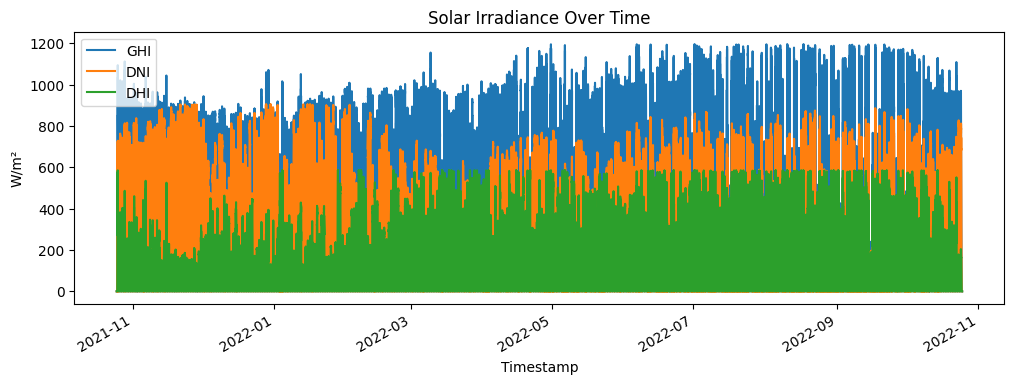

In [6]:
plot_time_series(df_clean)

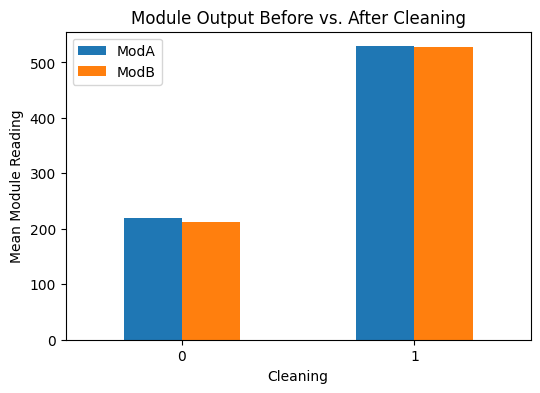

In [7]:
plot_cleaning_impact(df_clean)

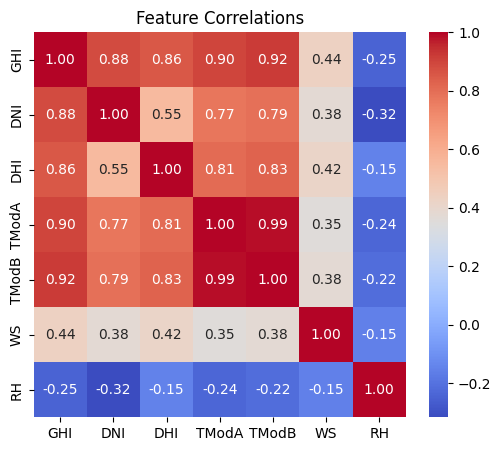

In [8]:
plot_correlation(df_clean)

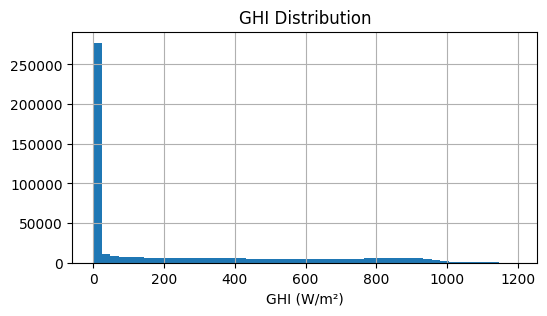

In [9]:
plot_histogram(df_clean)

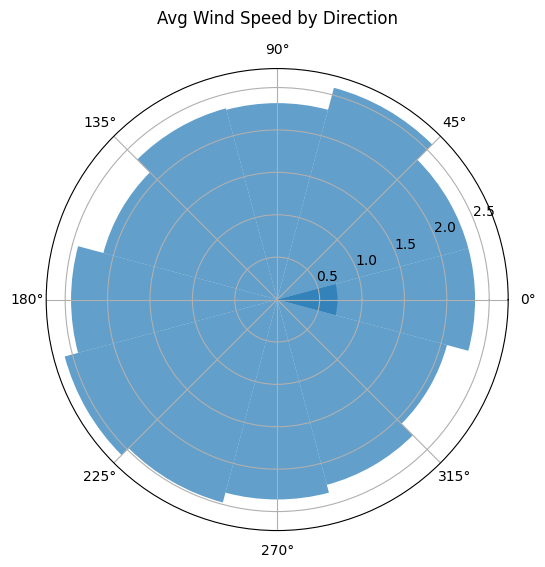

In [10]:
plot_wind_rose(df_clean)

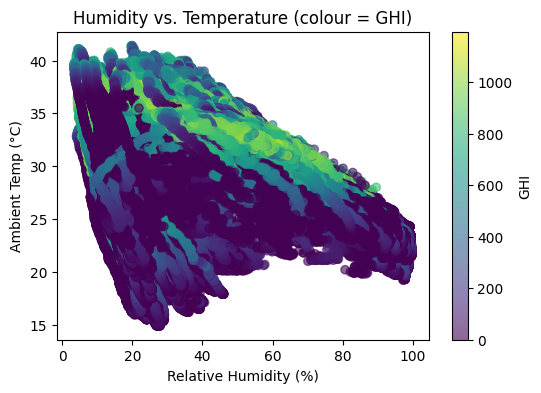

In [11]:
plot_humidity_temp(df_clean)

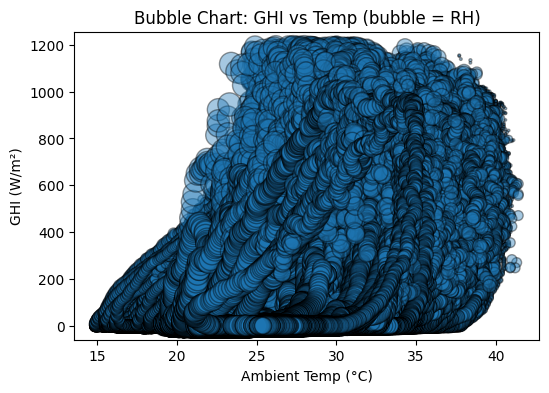

In [12]:
plot_bubble(df_clean)